In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [2]:
X_train, y_train = pd.read_csv('../data/X_train.csv'), pd.read_csv('../data/y_train.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    random_state=42,
    shuffle=True,
    stratify=y_train
)

In [4]:
X_train['AL_category'] = X_train['AL_category'].astype('category')
X_test['AL_category'] = X_test['AL_category'].astype('category')

In [5]:
y_train['Correto'] = y_train['Correto'].replace(['S', 'N'], [1, 0])
y_test['Correto'] = y_test['Correto'].replace(['S', 'N'], [1, 0])

/tmp/ipykernel_234092/756657008.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train['Correto'] = y_train['Correto'].replace(['S', 'N'], [1, 0])
/tmp/ipykernel_234092/756657008.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test['Correto'] = y_test['Correto'].replace(['S', 'N'], [1, 0])


In [6]:
y_train

,Correto
90,1
28,0
959,1
912,0
981,0
...,...
968,1
1042,1
849,1
760,0


## 7. Machine Learning Model Building

### Model training

In [7]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", enable_categorical=True, random_state=42)
xgb_model.fit(X_train, y_train)

preds = xgb_model.predict(X_train)

### Performance on training set

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
target_names=["S", "N"]
print(classification_report(y_train, preds, target_names=target_names))

              precision    recall  f1-score   support

           S       1.00      1.00      1.00       281
           N       1.00      1.00      1.00       681

    accuracy                           1.00       962
   macro avg       1.00      1.00      1.00       962
weighted avg       1.00      1.00      1.00       962



[Text(0, 0.5, 'S'), Text(0, 1.5, 'N')]

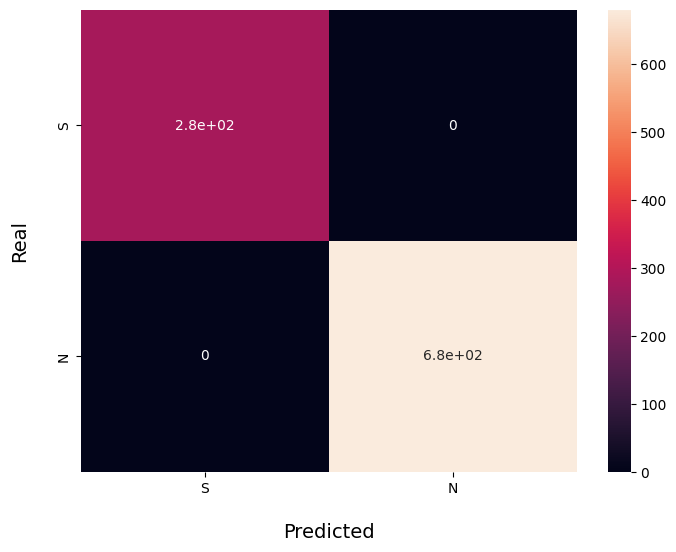

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(y_train, preds)
plt.figure(figsize=(8,6), dpi=100)

ax = sns.heatmap(cf_matrix, annot=True)

# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
 
# set y-axis label and ticks
ax.set_ylabel("Real", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)

## 8. Model Evaluation

In [10]:
test_preds = xgb_model.predict(X_test)

In [11]:
target_names=["S", "N"]
print(classification_report(y_test, test_preds, target_names=target_names))

              precision    recall  f1-score   support

           S       0.35      0.23      0.27        31
           N       0.72      0.83      0.77        76

    accuracy                           0.65       107
   macro avg       0.54      0.53      0.52       107
weighted avg       0.62      0.65      0.63       107



[Text(0, 0.5, 'S'), Text(0, 1.5, 'N')]

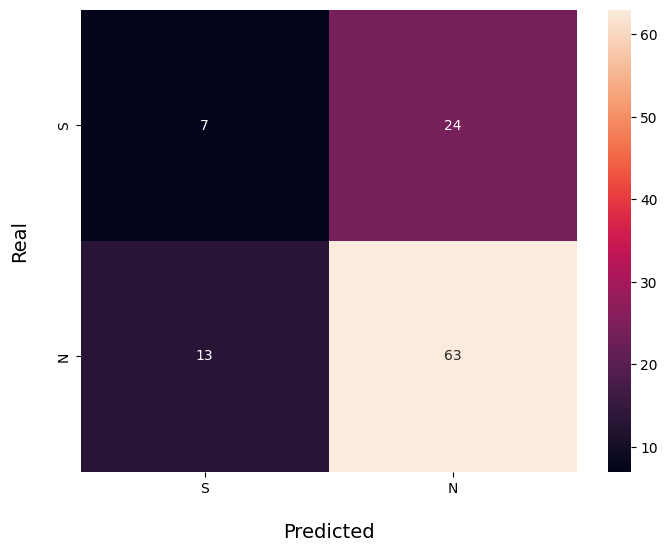

In [12]:
cf_matrix = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8,6), dpi=100)

ax = sns.heatmap(cf_matrix, annot=True)

# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
 
# set y-axis label and ticks
ax.set_ylabel("Real", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)